In [200]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks= True, grid=False)


In [201]:

path = ''
df_amazon = pd.read_csv(path+'amazon_reviews.csv')

In [202]:
df_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [203]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [204]:
df_amazon.dropna(inplace=True)

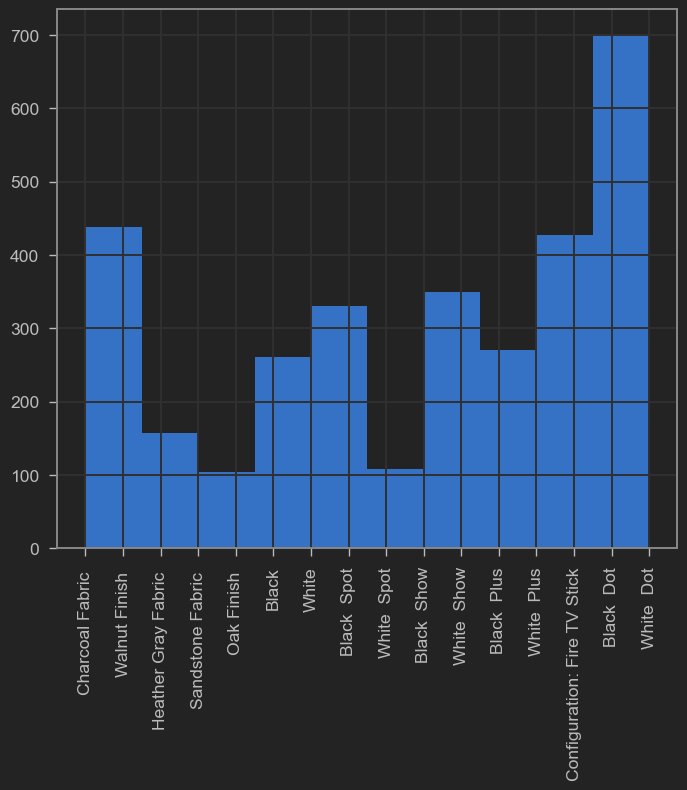

In [205]:
df_amazon["variation"].hist()
plt.xticks(rotation=90);

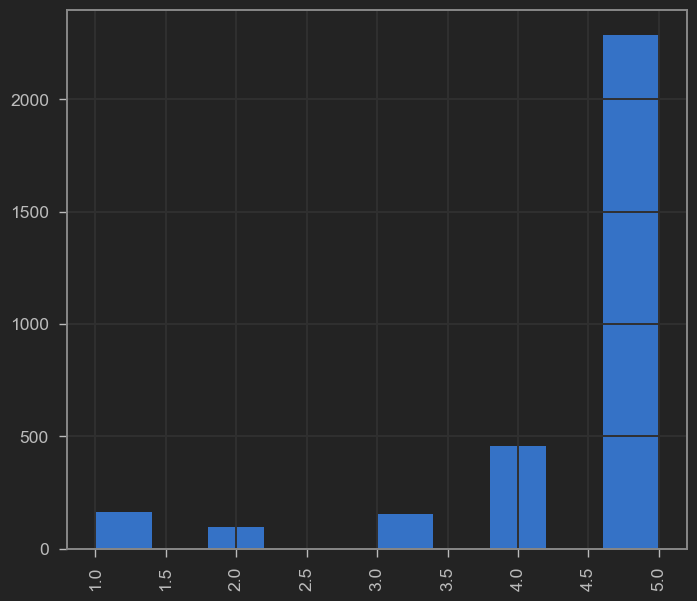

In [206]:
df_amazon["rating"].hist()
plt.xticks(rotation=90);

In [207]:
df_amazon["length"] = df_amazon["verified_reviews"].apply(len) 

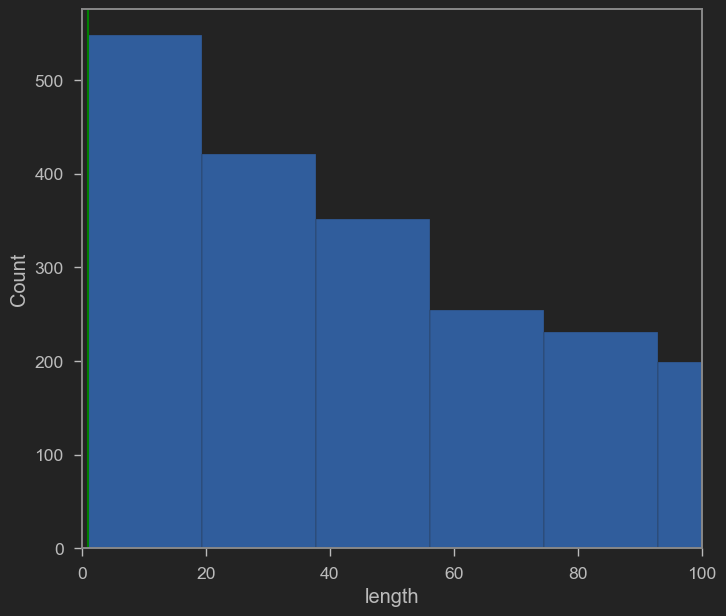

In [208]:
sns.histplot(x="length", data=df_amazon)
plt.axvline(x=np.mean(df_amazon["length"]), c="red")
plt.axvline(x=df_amazon["length"].mode()[0], c="green")
plt.xlim(0,100);

<Axes: xlabel='feedback', ylabel='length'>

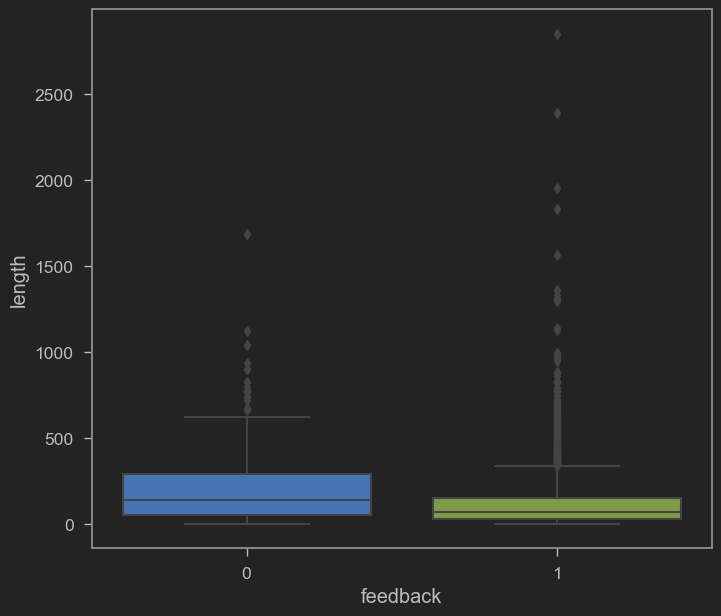

In [209]:
sns.boxplot(y="length",x="feedback" ,data=df_amazon)

In [210]:
df_amazon["length"].value_counts()

length
1      81
11     48
13     44
8      41
18     37
       ..
395     1
326     1
398     1
321     1
353     1
Name: count, Length: 490, dtype: int64

<Axes: xlabel='feedback', ylabel='count'>

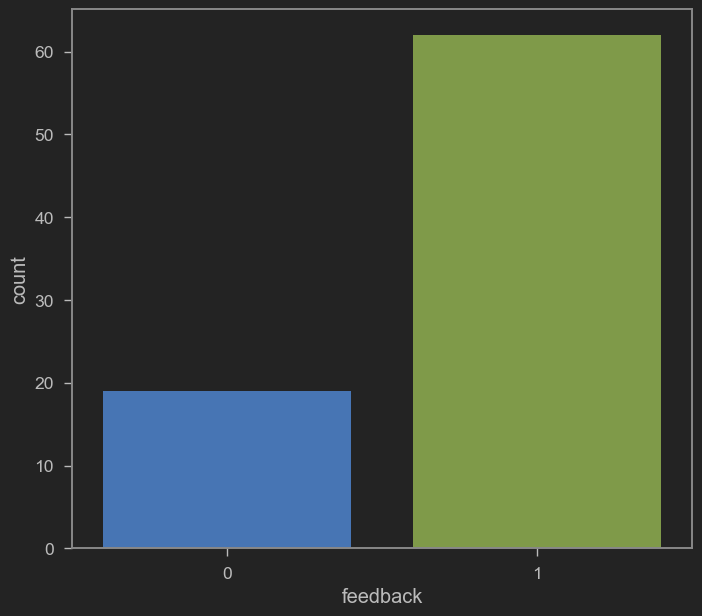

In [211]:
sns.countplot(x="feedback", data= df_amazon[df_amazon["length"] == 1])

In [212]:
from wordcloud import WordCloud

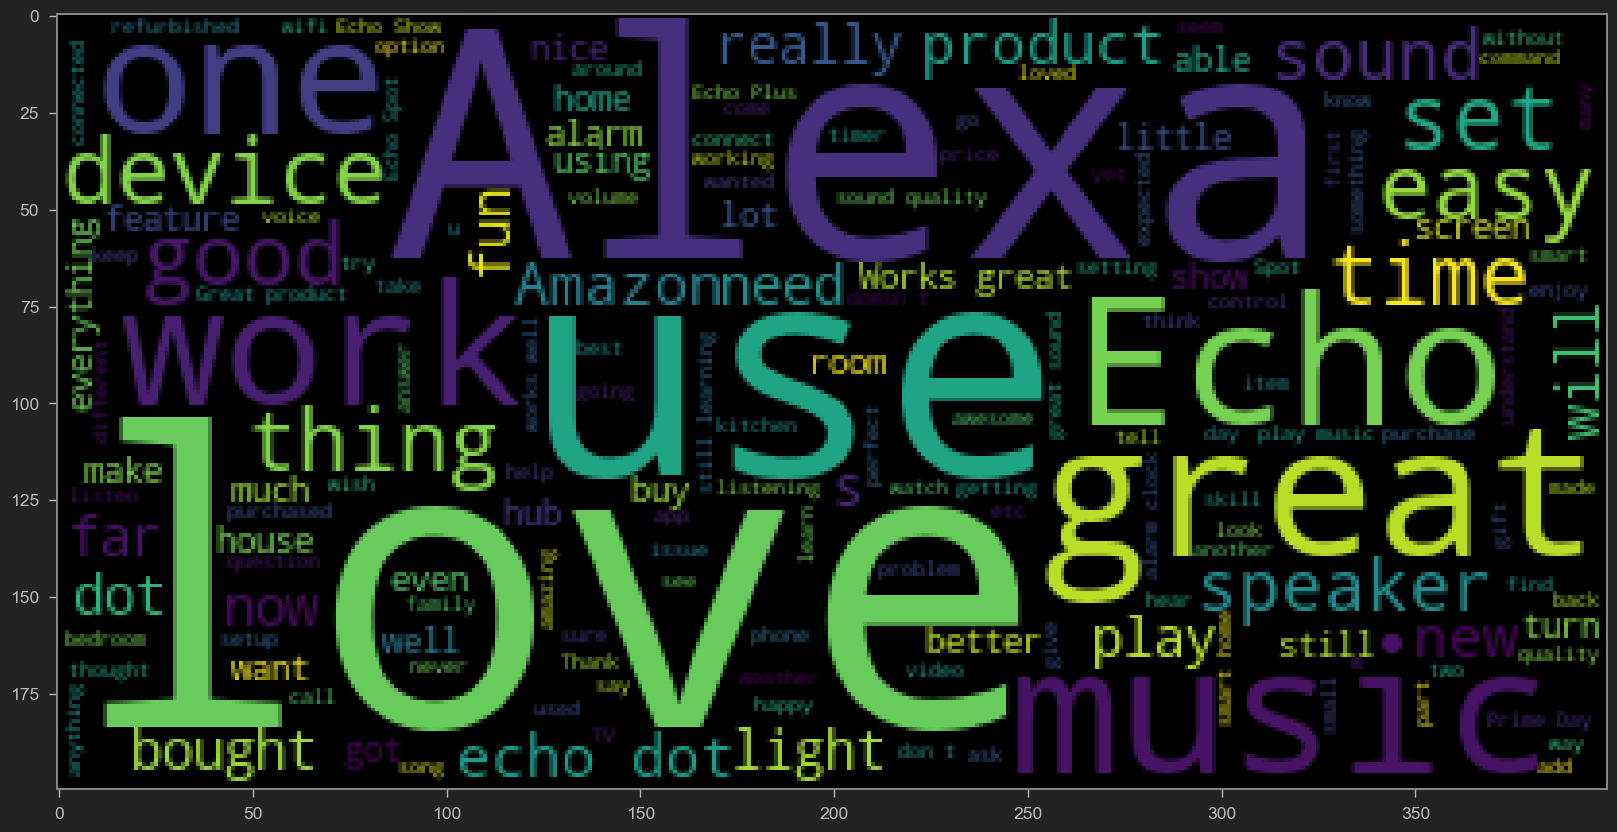

In [213]:
full_string = " ".join(df_amazon["verified_reviews"].tolist())
plt.figure(figsize=(20,20))

plt.imshow(WordCloud().generate(full_string))


In [214]:
import nltk

In [215]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
from nltk.corpus import stopwords
import string

In [217]:
stop_words = stopwords.words("english")
str_punctuation = string.punctuation

In [218]:
clean_text = [word for word in full_string if word not in str_punctuation]
clean_text = "".join(clean_text)
clean_text = [word for word in clean_text.split() if word.lower() not in stop_words]
clean_text = " ".join(clean_text)

In [219]:
pd.Series(clean_text.split()).value_counts()

love         554
Alexa        543
Echo         511
great        500
music        494
            ... 
anythingI      1
staying        1
30so           1
girls          1
spaces         1
Name: count, Length: 5211, dtype: int64

In [310]:
def clean_strings(text):
    clean_text = [word for word in text if word not in str_punctuation]
    clean_text = "".join(clean_text)
    clean_text = [word for word in clean_text.split() if word.lower() not in stop_words]
    clean_text = " ".join(clean_text)
    return clean_text

In [311]:
df_amazon["clean_text"] = df_amazon["verified_reviews"].apply(clean_strings)

In [312]:
from sklearn.feature_extraction.text import CountVectorizer

In [313]:
count = CountVectorizer()

In [314]:
X = count.fit_transform(df_amazon["clean_text"])

In [315]:
count.get_feature_names_out()

array(['072318', '10', '100', ..., 'zzzz', 'zzzzzzz', 'útil'],
      dtype=object)

In [316]:
df = pd.DataFrame(X.toarray(),columns=count.get_feature_names_out())

In [317]:
df.sum(axis=0).sort_values(ascending=False)[:5]

love     951
echo     826
great    717
alexa    596
music    524
dtype: int64

In [318]:
X = X.toarray()
X = pd.DataFrame(X)
X.shape


(3149, 4381)

In [319]:
y = df_amazon["feedback"]

In [320]:
X["rating"] = df_amazon["rating"]
X.shape

(3149, 4382)

In [321]:
df_calss =pd.get_dummies(df_amazon["variation"],drop_first=True,dtype=int)
df_calss.shape
df_calss.reset_index(drop=True,inplace=True)

In [322]:
X = pd.concat([X,df_calss],axis=1)


In [323]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [332]:
X.fillna(0,inplace=True)
X.columns = [i for i in range(len(X.columns))]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [333]:
Nb_model = MultinomialNB()
Nb_model.fit(X_train, y_train)

MultinomialNB()

In [334]:
y_predict = Nb_model.predict(X_test)

In [335]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.47      0.38      0.42        45
           1       0.95      0.97      0.96       585

    accuracy                           0.93       630
   macro avg       0.71      0.67      0.69       630
weighted avg       0.92      0.93      0.92       630



<Axes: >

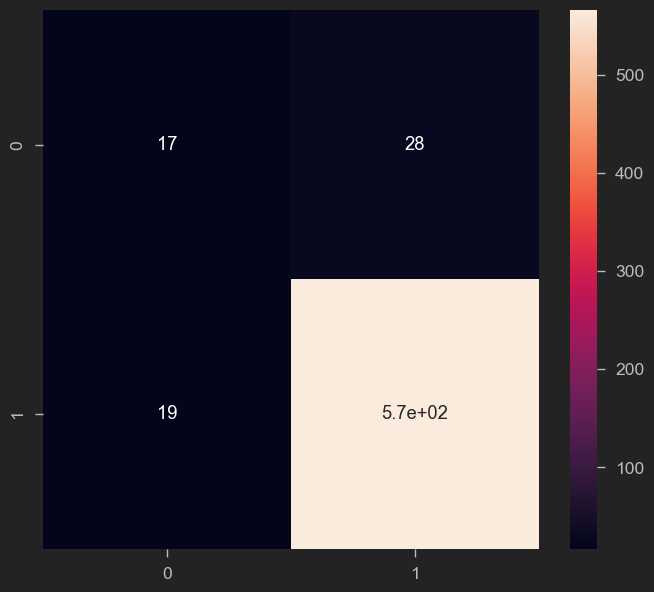

In [336]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)

In [337]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [338]:
ypred2 = model2.predict(X_test)


In [339]:
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.63      0.38      0.47        45
           1       0.95      0.98      0.97       585

    accuracy                           0.94       630
   macro avg       0.79      0.68      0.72       630
weighted avg       0.93      0.94      0.93       630



In [340]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)

GradientBoostingClassifier()

In [341]:
y_predict3 = model3.predict(X_test)

In [342]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.57      0.18      0.27        45
           1       0.94      0.99      0.96       585

    accuracy                           0.93       630
   macro avg       0.76      0.58      0.62       630
weighted avg       0.91      0.93      0.91       630



In [343]:
# LogisticRegression had the best performance for my prediction 
